In [1]:
#https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW
#https://www.imdb.com/chart/top

In [2]:
!pip install beautifulsoup4

In [3]:
import requests
import pandas as pd
from bs4 import BeautifulSoup
ID_Top = [ ]
Title_Top = [ ]
LTG_Top = [ ]
Year_Top = [ ]
i = [0,200,400,600,800]
for j in i:
 page = requests.get('https://www.boxofficemojo.com/chart/top_lifetime_gross/?area=XWW&offset='+ str (j))
 soup = BeautifulSoup(page.content,'html.parser')
 ID = soup.find_all('td',class_ = 'a-text-right mojo-header-column mojo-truncate mojo-field-type-rank')
 Title = soup.find_all('td', class_ = 'a-text-left mojo-field-type-title')
 LTG = soup.find_all('td', class_ = 'a-text-right mojo-field-type-money')
 Year = soup.find_all('td', class_ = 'a-text-left mojo-field-type-year')
 for i in ID:
   ID_Top.append(i.text)
 for i in Title:
   Title_Top.append(i.text)
 for i in LTG:
   LTG_Top.append(i.text)
 for i in Year:
   Year_Top.append(i.text)

In [4]:
df_Top_Movies_1000 = pd.DataFrame({'ID': ID_Top,'Title': Title_Top,'Life_Time_Gross': LTG_Top,'Year': Year_Top})

In [5]:
df_Top_Movies_1000.head()

,ID,Title,Life_Time_Gross,Year
0,1,Avengers: Endgame,"$2,797,800,564",2019
1,2,Avatar,"$2,790,439,092",2009
2,3,Titanic,"$2,195,170,133",1997
3,4,Star Wars: Episode VII - The Force Awakens,"$2,068,455,512",2015
4,5,Avengers: Infinity War,"$2,048,359,754",2018


In [6]:
Title_Top = [ ]
Rating_Top = [ ]
Year_Top = [ ]
page1 = requests.get('https://www.imdb.com/chart/top')
soup = BeautifulSoup(page1.content,'html.parser')
Title = soup.find_all('td',class_='titleColumn')
Year = soup.find_all('span',class_ = 'secondaryInfo')
Rating = soup.find_all('td',class_='ratingColumn imdbRating')
for i in Title:
  Title_Top.append(i.text)
for i in Year:
  Year_Top.append(i.text)
for i in Rating:
  Rating_Top.append(i.text)

In [7]:
df_Top_250_Movies = pd.DataFrame({'Title':Title_Top,'Year':Year_Top,'IMDB_Rating':Rating_Top})

In [8]:
data_1000 = pd.read_excel('/content/Top_1000_Movies_Data.xlsx')

In [9]:
data_250 = pd.read_excel('/content/Top_250_Movies_IMDB_R_Data.xlsx')

In [10]:
data_1000.head()

,ID,Title,Life_Time_Gross,Year
0,1,Avengers: Endgame,"$2,797,800,564",2019
1,2,Avatar,"$2,790,439,092",2009
2,3,Titanic,"$2,195,170,133",1997
3,4,Star Wars: Episode VII - The Force Awakens,"$2,068,455,512",2015
4,5,Avengers: Infinity War,"$2,048,359,754",2018


In [11]:
data_250.head()

,Unnamed: 0,Title,Year,IMDB_Rating
0,1.0,The Shawshank Redemption,1994,9.2
1,2.0,The Godfather,1972,9.1
2,3.0,The Godfather: Part II,1974,9.0
3,4.0,The Dark Knight,2008,9.0
4,5.0,12 Angry Men,1957,8.9


In [12]:
data_250.pop('Unnamed: 0')

0        1.0
1        2.0
2        3.0
3        4.0
4        5.0
       ...  
245    246.0
246    247.0
247    248.0
248    249.0
249    250.0
Name: Unnamed: 0, Length: 250, dtype: float64

In [13]:
data_250

,Title,Year,IMDB_Rating
0,The Shawshank Redemption,1994,9.2
1,The Godfather,1972,9.1
2,The Godfather: Part II,1974,9.0
3,The Dark Knight,2008,9.0
4,12 Angry Men,1957,8.9
...,...,...,...
245,The Battle of Algiers,1966,8.0
246,The Terminator,1984,8.0
247,Aladdin,1992,8.0
248,Tangerines,2013,8.0


In [14]:
result_data = pd.merge(data_1000,data_250)

In [15]:
result_data.to_excel('merged_MovieData.xlsx')

In [16]:
result = pd.read_excel('/content/final_Merged_MovieData.xlsx')

In [17]:
import io

urlfile="https://raw.githubusercontent.com/thechaudharysab/imdb-data-pandas-visualization/master/data/imdb_1000.csv"

url=requests.get(urlfile).content

df_Duration =pd.read_csv(io.StringIO(url.decode('utf-8')))

In [18]:
df_Duration.pop('star_rating')

0      9.3
1      9.2
2      9.1
3      9.0
4      8.9
      ... 
974    7.4
975    7.4
976    7.4
977    7.4
978    7.4
Name: star_rating, Length: 979, dtype: float64

In [19]:
df_Duration.pop('content_rating')

0          R
1          R
2          R
3      PG-13
4          R
       ...  
974       PG
975       PG
976    PG-13
977       PG
978        R
Name: content_rating, Length: 979, dtype: object

In [20]:
df_Duration.pop('genre')

0          Crime
1          Crime
2          Crime
3         Action
4          Crime
         ...    
974       Comedy
975    Adventure
976       Action
977       Horror
978        Crime
Name: genre, Length: 979, dtype: object

In [21]:
df_Duration.pop('actors_list')

0      [u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...
1        [u'Marlon Brando', u'Al Pacino', u'James Caan']
2      [u'Al Pacino', u'Robert De Niro', u'Robert Duv...
3      [u'Christian Bale', u'Heath Ledger', u'Aaron E...
4      [u'John Travolta', u'Uma Thurman', u'Samuel L....
                             ...                        
974    [u'Dustin Hoffman', u'Jessica Lange', u'Teri G...
975    [u'Michael J. Fox', u'Christopher Lloyd', u'Ma...
976    [u'Russell Crowe', u'Paul Bettany', u'Billy Bo...
977    [u'JoBeth Williams', u"Heather O'Rourke", u'Cr...
978    [u'Charlie Sheen', u'Michael Douglas', u'Tamar...
Name: actors_list, Length: 979, dtype: object

In [22]:
df_Duration.columns = ['Title','Duration']

In [23]:
df_Duration.head()

,Title,Duration
0,The Shawshank Redemption,142
1,The Godfather,175
2,The Godfather: Part II,200
3,The Dark Knight,152
4,Pulp Fiction,154


In [24]:
final_Movie_Data = pd.merge(result,df_Duration)

In [25]:
final_Movie_Data.head()

,ID,Title,Life_Time_Gross,Year,IMDB_Rating,Genre,Rating,Duration
0,3,Harry Potter and the Deathly Hallows: Part 2,"$1,342,206,619",2011,8.1,"Adventure, Drama, Fantasy",PG-13,130
1,4,The Lord of the Rings: The Return of the King,"$1,142,270,989",2003,8.9,"Action, Adventure, Drama",PG-13,201
2,5,The Dark Knight Rises,"$1,081,141,368",2012,8.3,"Action, Adventure",PG-13,165
3,7,Toy Story 3,"$1,066,969,703",2010,8.2,"Animation, Adventure, Comedy",G,103
4,8,Jurassic Park,"$1,033,920,013",1993,8.1,"Action, Adventure, Sci-Fi",PG-13,127


In [26]:
len(final_Movie_Data)

60

In [27]:
final_Movie_Data.pop('ID')

0      3
1      4
2      5
3      7
4      8
5      9
6     10
7     11
8     12
9     13
10    15
11    18
12    19
13    20
14    21
15    23
16    24
17    26
18    27
19    28
20    29
21    30
22    31
23    32
24    33
25    34
26    35
27    36
28    37
29    38
30    39
31    40
32    43
33    44
34    46
35    47
36    48
37    49
38    50
39    52
40    53
41    55
42    56
43    57
44    58
45    59
46    60
47    62
48    63
49    64
50    65
51    67
52    68
53    69
54    70
55    71
56    72
57    73
58    76
59    77
Name: ID, dtype: int64

In [28]:
import numpy as np


In [29]:
final_Movie_Data.insert(0,'ID',np.arange(1,61,1))
final_Movie_Data.head()

,ID,Title,Life_Time_Gross,Year,IMDB_Rating,Genre,Rating,Duration
0,1,Harry Potter and the Deathly Hallows: Part 2,"$1,342,206,619",2011,8.1,"Adventure, Drama, Fantasy",PG-13,130
1,2,The Lord of the Rings: The Return of the King,"$1,142,270,989",2003,8.9,"Action, Adventure, Drama",PG-13,201
2,3,The Dark Knight Rises,"$1,081,141,368",2012,8.3,"Action, Adventure",PG-13,165
3,4,Toy Story 3,"$1,066,969,703",2010,8.2,"Animation, Adventure, Comedy",G,103
4,5,Jurassic Park,"$1,033,920,013",1993,8.1,"Action, Adventure, Sci-Fi",PG-13,127


In [30]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Duration')

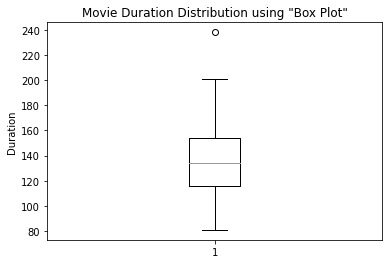

In [44]:
# Box Plot
plt.boxplot(final_Movie_Data['Duration'])
plt.title('Movie Duration Distribution using "Box Plot"')
plt.ylabel('Duration')

In [32]:
final_Movie_Data['Rating'] = final_Movie_Data['Rating'].str.replace(' ','')
final_Movie_Data['Rating']

0      PG-13
1      PG-13
2      PG-13
3          G
4      PG-13
5      PG-13
6          G
7      PG-13
8          G
9      PG-13
10     PG-13
11        PG
12     PG-13
13     PG-13
14     PG-13
15         G
16        PG
17         R
18         G
19        PG
20         R
21        PG
22     PG-13
23         R
24         R
25         R
26         R
27         G
28    Passed
29         R
30        PG
31        PG
32     PG-13
33         R
34         R
35        PG
36     PG-13
37         R
38         R
39         R
40     PG-13
41         R
42         R
43         R
44         R
45         R
46        PG
47         R
48        PG
49        PG
50         R
51     PG-13
52     PG-13
53         R
54         R
55         R
56         R
57         R
58         R
59         R
Name: Rating, dtype: object

Text(0, 0.5, 'Title Count')

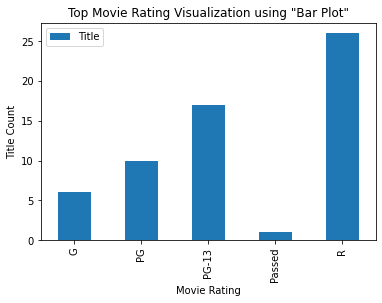

In [51]:
# Bar Plot
final_Movie_Data[['Rating','Title']].groupby('Rating').count().plot(kind='bar', title='Top Movie Rating Visualization using "Bar Plot"')
plt.xlabel('Movie Rating')
plt.ylabel('Title Count')

In [35]:
final_Movie_Data['Life_Time_Gross'] = final_Movie_Data['Life_Time_Gross'].str.replace(',','')

In [36]:
final_Movie_Data['Life_Time_Gross'] = final_Movie_Data['Life_Time_Gross'].str.replace('$','')

In [37]:
final_Movie_Data.head()

,ID,Title,Life_Time_Gross,Year,IMDB_Rating,Genre,Rating,Duration
0,1,Harry Potter and the Deathly Hallows: Part 2,1342206619,2011,8.1,"Adventure, Drama, Fantasy",PG-13,130
1,2,The Lord of the Rings: The Return of the King,1142270989,2003,8.9,"Action, Adventure, Drama",PG-13,201
2,3,The Dark Knight Rises,1081141368,2012,8.3,"Action, Adventure",PG-13,165
3,4,Toy Story 3,1066969703,2010,8.2,"Animation, Adventure, Comedy",G,103
4,5,Jurassic Park,1033920013,1993,8.1,"Action, Adventure, Sci-Fi",PG-13,127


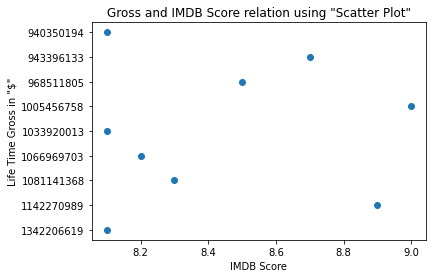

<Figure size 432x288 with 0 Axes>

In [54]:
# Scatter Plot
plt.scatter(x = final_Movie_Data['IMDB_Rating'][:9],y= final_Movie_Data['Life_Time_Gross'][:9])
plt.title('Gross and IMDB Score relation using "Scatter Plot"')
plt.xlabel('IMDB Score')
plt.ylabel('Life Time Gross in "$"')
plt.show()
plt.savefig('scatter.pdf')

In [55]:
plt.savefig('scatt.png', bbox_inches = 'tight')

<Figure size 432x288 with 0 Axes>